# 광물 예측 

## 데이터 확인 및 실행

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import LabelEncoder


import pandas as pd
import numpy as np
import tensorflow as tf

### 데이터 개요 파악

In [ ]:
# seed 값 설정
np.random.seed(3)
tf.random.set_seed(3)

# 데이터 입력
df = pd.read_csv('../content/drive/MyDrive/모두의 딥러닝/deeplearning/dataset/sonar.csv',header=None)

print(df.info())
print(df.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       208 non-null    float64
 1   1       208 non-null    float64
 2   2       208 non-null    float64
 3   3       208 non-null    float64
 4   4       208 non-null    float64
 5   5       208 non-null    float64
 6   6       208 non-null    float64
 7   7       208 non-null    float64
 8   8       208 non-null    float64
 9   9       208 non-null    float64
 10  10      208 non-null    float64
 11  11      208 non-null    float64
 12  12      208 non-null    float64
 13  13      208 non-null    float64
 14  14      208 non-null    float64
 15  15      208 non-null    float64
 16  16      208 non-null    float64
 17  17      208 non-null    float64
 18  18      208 non-null    float64
 19  19      208 non-null    float64
 20  20      208 non-null    float64
 21  21      208 non-null    float64
 22  22

208개 샘플 , 60개 속성, 1 클래스 파악

In [ ]:
# 판다스로 데이터 추출할 때 values 사용
dataset = df.values
x= dataset[:,0:60]
y_obj= dataset[:,60]
x= np.array(x).astype(np.float32)# x를 실수 넘파이로 변환 안해주면 에러가 남 이유는 모르겠음
#x = df.iloc[:,:-1]
#y = df.iloc[:,-1]
# 문자열 숫자로 변환
e= LabelEncoder()
e.fit(y_obj)
y = e.transform(y_obj)


###모델 설계 및 학습

In [ ]:
# 모델 설계
model = Sequential()
model.add(Dense(24,input_dim=60,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

# 모델 컴파일
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# 모델 학습
#x= np.array(x).astype(np.float32)# x를 실수 넘파이로 변환 안해주면 에러가 남 이유는 모르겠음
model.fit(x,y,epochs=100,batch_size=5)

Epoch 1/100
42/42 [==============================] - 1s 1ms/step - loss: 0.6844 - accuracy: 0.5403
Epoch 2/100
42/42 [==============================] - 0s 1ms/step - loss: 0.6610 - accuracy: 0.5863
Epoch 3/100
42/42 [==============================] - 0s 1ms/step - loss: 0.6239 - accuracy: 0.6651
Epoch 4/100
42/42 [==============================] - 0s 1ms/step - loss: 0.6026 - accuracy: 0.6914
Epoch 5/100
42/42 [==============================] - 0s 1ms/step - loss: 0.5783 - accuracy: 0.7494
Epoch 6/100
42/42 [==============================] - 0s 2ms/step - loss: 0.5361 - accuracy: 0.7378
Epoch 7/100
42/42 [==============================] - 0s 1ms/step - loss: 0.5085 - accuracy: 0.7755
Epoch 8/100
42/42 [==============================] - 0s 1ms/step - loss: 0.4644 - accuracy: 0.7959
Epoch 9/100
42/42 [==============================] - 0s 1ms/step - loss: 0.4818 - accuracy: 0.8033
Epoch 10/100
42/42 [==============================] - 0s 2ms/step - loss: 0.4388 - accuracy: 0.7902
Epoch 11/

In [ ]:
# 모델 평가
print(model.evaluate(x,y)) # 책에서는 evaluate(x,y)[1] 이라 했는데 결과값 같음

7/7 [==============================] - 0s 2ms/step - loss: 0.0813 - accuracy: 0.9808
[0.0813496857881546, 0.9807692170143127]


### 결과: 오버피팅
결과: 모델 정확도 99.04%  
- 정확도가 너무 높다 => 과적합(overfitting) 예상

# 과적합 방지하기



## 13.3 학습셋과 테스트셋
과적합 인지 알 수 있도록 학습셋과 테스트셋을 나누어 학습시킨다.

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split # 데이터를 학습셋과 테스트셋으로 나눔

import pandas as pd
import numpy as np
import tensorflow as tf

In [ ]:
# seed 값 설정
seed=0
np.random.seed(seed)
tf.random.set_seed(3)

# 데이터 불러오기 
df = pd.read_csv('../content/drive/MyDrive/모두의 딥러닝/deeplearning/dataset/sonar.csv',header=None)

dataset = df.values
x = dataset[:,0:60]
y_obj = dataset[:,60]
x= np.array(x).astype(np.float32)# x를 실수 넘파이로 변환 안해주면 에러가 남 이유는 모르겠음

# 문자열 숫자 인코딩
e =LabelEncoder()
e.fit(y_obj)
y = e.transform(y_obj)

# 학습셋 테스트셋 구분 
# random_state : 나눌 데이터를 랜덤하게 뽑는지 , 정수면 데이터는 seed
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state = seed) 

# 모델 설계
model = Sequential()
model.add(Dense(24,input_dim=60,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

# 모델 컴파일
model.compile(loss='mean_squared_error',
              optimizer='adam',
              metrics=['accuracy'])
# 여기선 평균제곱 오차를 사용했네

# 모델 학습
# 학습셋으로 학습
#x_train = np.array(x_train).astype(np.float32)# x를 실수 넘파이로 변환 안해주면 에러가 남 이유는 모르겠음
model.fit(x_train,y_train,epochs=130,batch_size=5)

# 테스트셋에 모델 적용
#x_test = np.array(x_test).astype(np.float32)# x를 실수 넘파이로 변환 안해주면 에러가 남 이유는 모르겠음
print(model.evaluate(x_test,y_test)) # evaluate 의 결과값 [손실,정확도]

Epoch 1/130
29/29 [==============================] - 0s 1ms/step - loss: 0.2468 - accuracy: 0.4837
Epoch 2/130
29/29 [==============================] - 0s 1ms/step - loss: 0.2384 - accuracy: 0.6013
Epoch 3/130
29/29 [==============================] - 0s 1ms/step - loss: 0.2153 - accuracy: 0.6879
Epoch 4/130
29/29 [==============================] - 0s 1ms/step - loss: 0.2156 - accuracy: 0.7034
Epoch 5/130
29/29 [==============================] - 0s 1ms/step - loss: 0.1945 - accuracy: 0.7643
Epoch 6/130
29/29 [==============================] - 0s 1ms/step - loss: 0.1900 - accuracy: 0.7571
Epoch 7/130
29/29 [==============================] - 0s 1ms/step - loss: 0.1884 - accuracy: 0.7188
Epoch 8/130
29/29 [==============================] - 0s 1ms/step - loss: 0.1708 - accuracy: 0.8209
Epoch 9/130
29/29 [==============================] - 0s 1ms/step - loss: 0.1602 - accuracy: 0.7874
Epoch 10/130
29/29 [==============================] - 0s 1ms/step - loss: 0.1594 - accuracy: 0.8317
Epoch 11/

### 테스트셋 결과
- 테스트셋의 정확도 86% 로 과적합을 벗어남 

## 검증셋(validation set) 이용

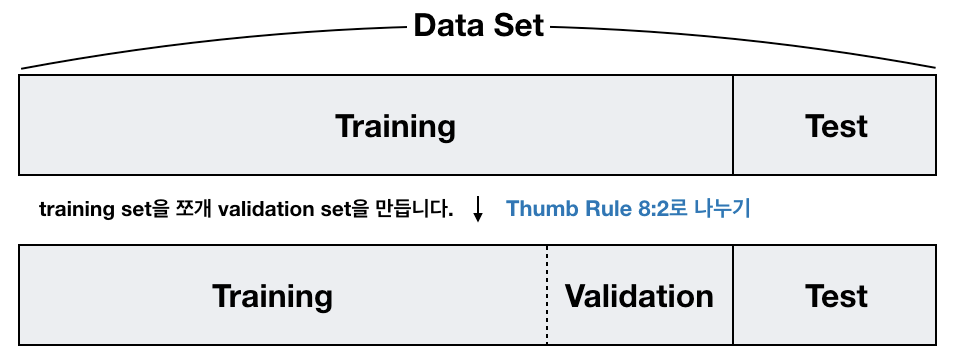

과정은 학습셋,테스트셋과 동일한데 모델 학습만 다름

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split # 데이터를 학습셋과 테스트셋으로 나눔

import pandas as pd
import numpy as np
import tensorflow as tf

In [ ]:


# seed 값 설정
seed=0
np.random.seed(seed)
tf.random.set_seed(3)

# 데이터 불러오기 
df = pd.read_csv('../content/drive/MyDrive/모두의 딥러닝/deeplearning/dataset/sonar.csv',header=None)

dataset = df.values
x = dataset[:,0:60]
y_obj = dataset[:,60]
x= np.array(x).astype(np.float32)# x를 실수 넘파이로 변환 안해주면 에러가 남 이유는 모르겠음

# 문자열 숫자 인코딩
e =LabelEncoder()
e.fit(y_obj)
y = e.transform(y_obj)

# 학습셋 테스트셋 구분 
# random_state : 나눌 데이터를 랜덤하게 뽑는지 , 정수면 데이터는 seed
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state = seed) 

# 모델 설계
model = Sequential()
model.add(Dense(24,input_dim=60,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

# 모델 컴파일
model.compile(loss='mean_squared_error',optimizer='adam', metrics=['accuracy'])










모델 학습 실행시에만 다름  
validation_split= 를 추가

In [ ]:
model.fit(x_train,y_train,epochs=200, batch_size=5, validation_split=0.25)

Epoch 1/200
22/22 [==============================] - 1s 23ms/step - loss: 0.2455 - accuracy: 0.5483 - val_loss: 0.2471 - val_accuracy: 0.5135
Epoch 2/200
22/22 [==============================] - 0s 3ms/step - loss: 0.2209 - accuracy: 0.6345 - val_loss: 0.2409 - val_accuracy: 0.5405
Epoch 3/200
22/22 [==============================] - 0s 3ms/step - loss: 0.2163 - accuracy: 0.6761 - val_loss: 0.2325 - val_accuracy: 0.6216
Epoch 4/200
22/22 [==============================] - 0s 3ms/step - loss: 0.2061 - accuracy: 0.7279 - val_loss: 0.2293 - val_accuracy: 0.5946
Epoch 5/200
22/22 [==============================] - 0s 3ms/step - loss: 0.2144 - accuracy: 0.6852 - val_loss: 0.2180 - val_accuracy: 0.6757
Epoch 6/200
22/22 [==============================] - 0s 3ms/step - loss: 0.1998 - accuracy: 0.7311 - val_loss: 0.2132 - val_accuracy: 0.7027
Epoch 7/200
22/22 [==============================] - 0s 3ms/step - loss: 0.1807 - accuracy: 0.7834 - val_loss: 0.2025 - val_accuracy: 0.7027
Epoch 8/200


### 검증셋 학습 결과


In [ ]:
print(model.evaluate(x,y)[1])

7/7 [==============================] - 0s 2ms/step - loss: 0.0710 - accuracy: 0.9279
0.9278846383094788


정확도 92% 로 살짝 오버피팅 방지

## 13.4 모델의 저장과 재사용
: 학습시킨 모델을 저장하고 나중에 사용할 수 있다.

### 모델의 저장

In [ ]:
from keras.models import load_model

# 모델을 my_model.h5로 저장
model.save('my_model.h5')

### 현재 모델의 삭제

In [ ]:
del model

### 모델 불러오기

In [ ]:
load_model('my_model.h5')

## K겹 교차 검증(k_fold cross validation)


In [ ]:
from sklearn.model_selection import StratifiedKFold



n_fold =5 # 5겹 교차
skf = StratifiedKFold(n_splits = n_fold ,shuffle=True, random_state = seed)

# 정확도 리스트
accuracy1=[]

# 모델설정 및 실행
for train,test in skf.split(x,y):
  model = Sequential()
  model.add(Dense(24,input_dim=60,activation='relu'))
  model.add(Dense(10,activation='relu'))
  model.add(Dense(1,activation='sigmoid'))
  
  model.compile(loss='mean_squared_error',optimizer='adam',metrics=['accuracy'])
  model.fit(x[train],y[train],epochs=10,batch_size=5)

  # n번째 정확도 배열에 추가하기
  k_accuracy = model.evaluate(x[test],y[test])[1]
  accuracy1.append(k_accuracy)





Epoch 1/10
34/34 [==============================] - 0s 1ms/step - loss: 0.2686 - accuracy: 0.4343
Epoch 2/10
34/34 [==============================] - 0s 1ms/step - loss: 0.2413 - accuracy: 0.6273
Epoch 3/10
34/34 [==============================] - 0s 1ms/step - loss: 0.2280 - accuracy: 0.7186
Epoch 4/10
34/34 [==============================] - 0s 1ms/step - loss: 0.2286 - accuracy: 0.7416
Epoch 5/10
34/34 [==============================] - 0s 1ms/step - loss: 0.2217 - accuracy: 0.7383
Epoch 6/10
34/34 [==============================] - 0s 2ms/step - loss: 0.2158 - accuracy: 0.7425
Epoch 7/10
34/34 [==============================] - 0s 1ms/step - loss: 0.2078 - accuracy: 0.7456
Epoch 8/10
34/34 [==============================] - 0s 1ms/step - loss: 0.1890 - accuracy: 0.7693
Epoch 9/10
34/34 [==============================] - 0s 1ms/step - loss: 0.1966 - accuracy: 0.7616
Epoch 10/10
2/2 [==============================] - 0s 3ms/step - loss: 0.2134 - accuracy: 0.6905
Epoch 1/10
34/34 [===

### 교차검증 결과

In [ ]:
print(accuracy1)

[0.6904761791229248, 0.738095223903656, 0.6190476417541504, 0.6829268336296082, 0.707317054271698]
